In [86]:
%matplotlib inline

import numpy as np
import xarray as xr

import fill_POP_core

import matplotlib.pyplot as plt


import pop_tools

## Generate some psuedo-data with coastline

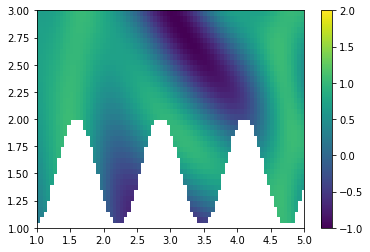

In [87]:
dx, dy = 0.05, 0.05

y, x = np.mgrid[slice(1, 3 + dy, dy),
                slice(1, 5 + dx, dx)]

z_orig = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

valid_points = np.ones(z_orig.shape, dtype=np.bool)
valid_points = np.where(y < 0.5*np.sin(5*x)+1.5, False, valid_points)

z_orig = np.where(~valid_points, np.nan, z_orig)
z_orig[0, :] = np.nan


cb = plt.pcolormesh(x, y, z_orig, vmin=-1, vmax=2.)
plt.colorbar(cb)

Add missing values in one embayment

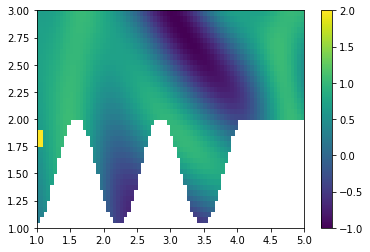

In [88]:
z_miss = z_orig.copy()
z_miss[:20, 62:] = np.nan

z_miss[15:18, 0:2] = 10.0

cb = plt.pcolormesh(x, y, z_miss, vmin=-1, vmax=2.)
plt.colorbar(cb)

CPU times: user 31.7 ms, sys: 157 µs, total: 31.8 ms
Wall time: 32.6 ms


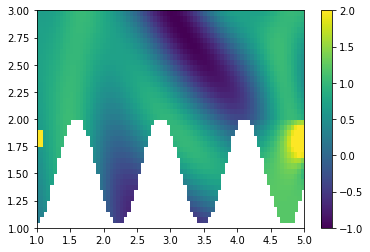

In [89]:
%%time
tol = 1.0e-4

fillmask = (np.isnan(z_miss) & valid_points)

var_pass = z_miss.astype(np.float32).copy().T

msv = 1e36
var_pass[np.isnan(var_pass)] = msv

fill_POP_core.fill_pop_core(var=var_pass,
                            fillmask=fillmask.T,
                            msv=msv,
                            tol=tol,
                            ltripole=False)

var_pass[var_pass == msv] = np.nan
z_fill_ref = var_pass.T

cb = plt.pcolormesh(x, y, z_fill_ref, vmin=-1, vmax=2.)
plt.colorbar(cb)

CPU times: user 435 ms, sys: 215 µs, total: 435 ms
Wall time: 435 ms


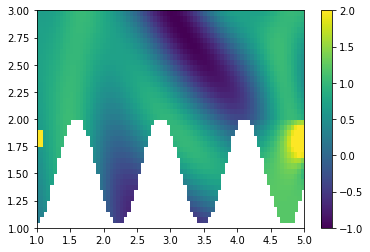

In [92]:
%%time
import fill
import importlib
importlib.reload(fill)

z_fill = fill.iterative_fill(z_miss, valid_points)

plt.figure()
cb = plt.pcolormesh(x, y, z_fill, vmin=-1, vmax=2.)
plt.colorbar(cb)

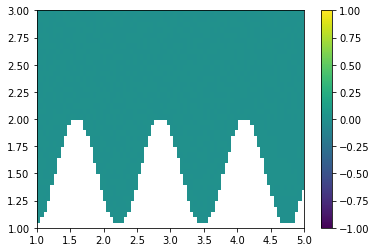

In [91]:
cb = plt.pcolormesh(x, y, z_fill-z_fill_ref, vmin=-1, vmax=1)
plt.colorbar(cb)